# Prueba Intertrimestral

Nombre y Apellidos: Tatiana López Buendía

Tiempo de la prueba: 1h y 45 mins

Asignatura: Desarrollo de Aplicaciones para la Visualización de Datos

Fecha: 14 de octubre de 2024

Instrucciones:

- Herramientas Sugeridas: Python (pandas, matplotlib, seaborn, scikit-learn).

- Evaluación: Se valorará la capacidad para interpretar los resultados y la claridad en la exposición de las conclusiones.

- Materiales permitidos: Materiales de clase. Internet para búsqueda de dudas y documentación.

- Prohibido: Mingún tipo de LLM, ni mensajería instantánea.

- Formato de Entrega: Los estudiantes deben presentar su trabajo en formato de notebook (por ejemplo, Jupyter Notebook), con gráficos y explicaciones detalladas.

- Entrega: Subir .ipynb y PDF a Github. Enviar resultados al siguiente enlace. Para crear PDF: File -> Print -> Destination as PDF

## [Entrega aquí el examen](https://forms.gle/gU7aKkzE7didZpYV7)




Carga aquí las librerías que creas que vayas a utilizar:

In [83]:
import pandas as pd
import numpy as np
import sklearn.datasets

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    classification_report,
    confusion_matrix
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression

# Ejercicio 1: Programación (2 puntos)

a) Crea una función que calcule y devuelva el valor de la iteración $n+1$ del mapa logístico dada la fórmula:

$x_{n+1}=r⋅x_n⋅(1−x_n)$

donde:

- $r$ es la tasa de crecimiento
- $x_n$ es el valor de la iteración anterior.

La función debe aceptar como parámetros $r$ y $x_n$ (valor inicial). (0.6 puntos)


In [84]:
def calculo(r, xn):
    xn1 = None
    xn1=r*xn*(1-xn)
    return xn1

b) Crea una función que genere una lista con las primeras n iteraciones del mapa logístico, utilizando la función anterior. (0.6 puntos)

In [85]:
def niteraciones(n,r,xn):
    lista=[]
    cons=0
    for i in range(0, n):
        if cons == 0:
            xn1=calculo(r,xn)
            cons=-1
        else:
            xn1=calculo(r,xn1)
        lista.append(calculo(r,xn1))
    return lista    
    

In [86]:
niteraciones(4,0.6,7)

[-396.14400000000006,
 -94395.72764160002,
 -5346388675.628863,
 -1.7150323125743364e+19]

c) Guarda en un dataframe las iteraciones del mapa logístico, para $r = \{0, 0.25, 0.5, 0.75, \dots, 4\}$ y semilla $x_0 = 0.2$. El dataframe debe tener tres columnas: $r$, $n$ y $x_{n+1}$. Muestra los 10 primeros resultados (0.6 puntos)

In [87]:
df = pd.DataFrame(columns=['r', 'n', 'xn+1'])
x0=0.2
xn1=0

for i in range(1, 17):
  r=i*1/4
  if x0==0.2:
    xn1=calculo(r,x0)
    x0=0
  else:
    xn1=calculo(r,xn1)
  df.loc[i] = [r, i, xn1]

print(df.shape)
df.head(10)

(16, 3)


,r,n,xn+1
1,0.25,1.0,0.040000
2,0.50,2.0,0.019200
3,0.75,3.0,0.014124
4,1.00,4.0,0.013924
5,1.25,5.0,0.017163
6,1.50,6.0,0.025302
7,1.75,7.0,0.043159
8,2.00,8.0,0.082592
9,2.25,9.0,0.170483
10,2.50,10.0,0.353547


d) ¿Cómo se podría programar en una clase las dos funciones anteriores para calcular y almacenar iteraciones del mapa logístico? Proporciona la implementación de la clase con un método para obtener el valor de una iteración específica, otro método para generar la lista completa de iteraciones y otro para crear un gráfico que visualice el $r$ y $x_{n+1}$. (0.2 puntos)

In [88]:
class data():

  def __init__(self):
    df = pd.DataFrame(columns=['r', 'n', 'xn+1'])
    self.df = df
    self.xn1 = None
    self.lista = []

  def calculo(self,r, xn):
    xn1=self.xn1
    xn1=r*xn*(1-xn)
    return xn1
  
  def niteraciones(self,n,r,xn):
    lista=self.lista
    cons=0
    for i in range(0, n):
        if cons == 0:
            xn1=calculo(r,xn)
            cons=-1
        else:
            xn1=calculo(r,xn1)
        lista.append(calculo(r,xn1))
    return lista

  def even(self, n):
    return True if (n % 2) == 0 else False

  def run(self, end):
  
    x0=0.2
    xn1=0
    for i in range(1, end):
      r=i*1/4
      if x0==0.2:
        xn1=self.calculo(r,x0)
        x0=0
      else:
        xn1=self.calculo(r,xn1)
      self.df.loc[i] = [r, i, xn1]
    return self.df


d = data()
df = d.run(20)
print(df.shape)
df.head(10)

(19, 3)


,r,n,xn+1
1,0.25,1.0,0.040000
2,0.50,2.0,0.019200
3,0.75,3.0,0.014124
4,1.00,4.0,0.013924
5,1.25,5.0,0.017163
6,1.50,6.0,0.025302
7,1.75,7.0,0.043159
8,2.00,8.0,0.082592
9,2.25,9.0,0.170483
10,2.50,10.0,0.353547


# Ejercicio 2: Exploración y comprensión (3 puntos)

a) Describe las principales variables del dataset proporcionado. ¿Qué información aportan y qué tipo de datos contiene cada una? ¿Existen valores faltantes en el dataset? Si es así, ¿en qué variables? ¿Qué propones para resolverlo? (1 puntos)


In [89]:
import pandas as pd

df = pd.read_csv("Walmart.csv")

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [90]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

Convertimos la fecha a Date

In [168]:
from datetime import datetime, timedelta, date
#df['Date'] = pd.to_datetime(df['Date'],'%d-%m-%Y')
#df['Date'] = pd.to_datetime(dia, mes, año)

AssertionError: 

In [92]:
df.describe(include='all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6434.000000
unique,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,05-02-2010,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.000000,NaN,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999047
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.876012
min,1.000000,NaN,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,NaN,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,NaN,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,NaN,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000


In [93]:
print(df.shape)

(6435, 8)


In [94]:
print(df.isna().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    1
dtype: int64


In [95]:
df = df.dropna()
#df.fillna(0)

In [96]:
print(df.isna().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


Ya no hay NaN.

In [97]:
df.describe(include='all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6434.000000,6434,6.434000e+03,6434.000000,6434.000000,6434.000000,6434.000000,6434.000000
unique,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,05-02-2010,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN
mean,22.996581,NaN,1.047016e+06,0.069941,60.664434,3.358512,171.575168,7.999047
std,12.986295,NaN,5.643956e+05,0.255067,18.446292,0.458992,39.358921,1.876012
min,1.000000,NaN,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,NaN,5.531677e+05,0.000000,47.445000,2.933000,131.735000,6.891000
50%,23.000000,NaN,9.608457e+05,0.000000,62.675000,3.445000,182.616521,7.874000
75%,34.000000,NaN,1.420282e+06,0.000000,74.945000,3.735000,212.745096,8.622000


In [98]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6429,45,21-09-2012,723086.20,0,65.32,4.038,191.856704,8.684
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667


b) Realiza un gráfico de barras que responda las siguientes preguntas. ¿Cuántas tiendas $Store$ están presentes en el dataset? ¿Cuál es la media de ventas semanales $Weekly Sales$ por tienda? ¿Qué tiendas tienen las ventas promedio más altas y más bajas? (1 puntos)



In [99]:
store_counts = df['Store'].value_counts()
store_counts

Store
1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    142
Name: count, dtype: int64

In [100]:
df.Store.count()

6434

In [101]:
df.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

Hay un total de 6434 Stores,en concreto 45 tipos 

In [102]:
df_2= df.groupby("Store")["Weekly_Sales"].mean()
df_2

Store
1     1.555264e+06
2     1.925751e+06
3     4.027044e+05
4     2.094713e+06
5     3.180118e+05
6     1.564728e+06
7     5.706173e+05
8     9.087495e+05
9     5.439806e+05
10    1.899425e+06
11    1.356383e+06
12    1.009002e+06
13    2.003620e+06
14    2.020978e+06
15    6.233125e+05
16    5.192477e+05
17    8.935814e+05
18    1.084718e+06
19    1.444999e+06
20    2.107677e+06
21    7.560691e+05
22    1.028501e+06
23    1.389864e+06
24    1.356755e+06
25    7.067215e+05
26    1.002912e+06
27    1.775216e+06
28    1.323522e+06
29    5.394514e+05
30    4.385796e+05
31    1.395901e+06
32    1.166568e+06
33    2.598617e+05
34    9.667816e+05
35    9.197250e+05
36    3.735120e+05
37    5.189003e+05
38    3.857317e+05
39    1.450668e+06
40    9.641280e+05
41    1.268125e+06
42    5.564039e+05
43    6.333247e+05
44    3.027489e+05
45    7.864593e+05
Name: Weekly_Sales, dtype: float64

In [103]:
import plotly.express as px

# Crear gráfico de barras con colores personalizados
fig = px.bar(store_counts, 
             x=df_2.index, 
             y=df_2.values, 
             labels={'x': 'Store', 'y': 'Weekly Sales Mean'}, 
             title="Media de ventas semanales por tienda",
             color=df_2.index,  
             color_discrete_sequence=px.colors.qualitative.Vivid) 

# Mostrar el gráfico
fig.show()

Las tiendas con mayor media de ventas semanales son las 4 y la 20.

Las tiendas con menor media de ventas semanales son las 33, 44 y 5

c) Genera un gráfico de líneas que muestre la evolución de las ventas semanales $Weekly Sales$ a lo largo del tiempo para la tienda con más ventas totales. ¿Observas algún patrón estacional o tendencia? (1 puntos)

In [104]:
max=df["Weekly_Sales"].max()

In [105]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6429,45,21-09-2012,723086.20,0,65.32,4.038,191.856704,8.684
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667


In [106]:
df.Weekly_Sales

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6429     723086.20
6430     713173.95
6431     733455.07
6432     734464.36
6434     760281.43
Name: Weekly_Sales, Length: 6434, dtype: float64

In [107]:
df_3= df.Weekly_Sales >= max

In [113]:
print(df[df_3 == True]['Store'].describe())

count     1.0
mean     14.0
std       NaN
min      14.0
25%      14.0
50%      14.0
75%      14.0
max      14.0
Name: Store, dtype: float64


In [115]:
df[df_3 == True]['Store']

1905    14
Name: Store, dtype: int64

Se trata de la Store 14

In [120]:
df.Store

0        1
1        1
2        1
3        1
4        1
        ..
6429    45
6430    45
6431    45
6432    45
6434    45
Name: Store, Length: 6434, dtype: int64

In [142]:
n=0
df_ws_14 = pd.DataFrame(columns=['Sales'])
df_date_14 = pd.DataFrame(columns=['Date'])
for i in df.Store:
    if i==14:
        df_ws_14.loc[n] = df["Weekly_Sales"][i]
        df_date_14.loc[n] = df["Date"][i]
        n=n+1
    else:
        continue

In [144]:
df_date_14

,Date
0,14-05-2010
1,14-05-2010
2,14-05-2010
3,14-05-2010
4,14-05-2010
...,...
138,14-05-2010
139,14-05-2010
140,14-05-2010
141,14-05-2010


In [141]:
df_ws_14

,Sales
0,1494251.5
1,1494251.5
2,1494251.5
3,1494251.5
4,1494251.5
...,...
138,1494251.5
139,1494251.5
140,1494251.5
141,1494251.5


In [146]:
df_ws_14["Sales"]

0      1494251.5
1      1494251.5
2      1494251.5
3      1494251.5
4      1494251.5
         ...    
138    1494251.5
139    1494251.5
140    1494251.5
141    1494251.5
142    1494251.5
Name: Sales, Length: 143, dtype: float64

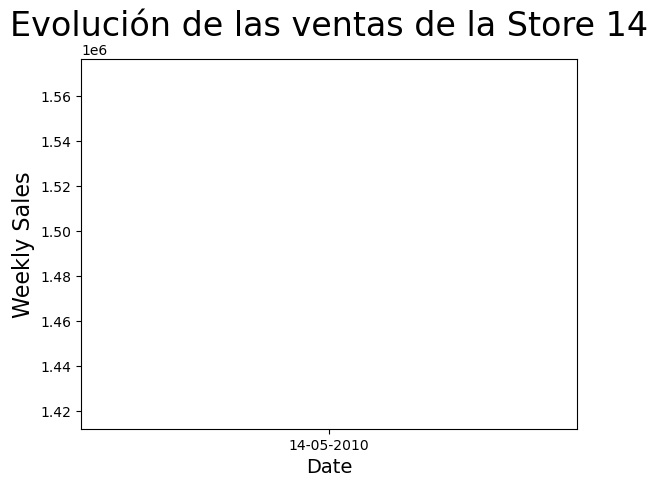

In [155]:
valoresY = [50,25,30,29,40,45]
valoresX = [10,20,30,40,50,60]
fig, ax = plt.subplots()

plt.plot(df_date_14["Date"], df_ws_14["Sales"], color = 'r', linewidth = 2.5, linestyle = ':')
#Añadir nombre al eje x
plt.xlabel("Date", fontsize = 14)

# Añadir nombre al eje y
plt.ylabel("Weekly Sales", fontsize = 16)

# Agregar título al gráfico
plt.title("Evolución de las ventas de la Store 14", fontsize = 24)

# Agregar grid
plt.show()

# Ejrcicio 3: Análisis de Factores Externos (2 puntos)

a) Explora la relación entre el precio de combustible $Fuel Price$, la tasa de desempleo $Unemployment$ y las ventas semanales $Weekly Sales$. ¿Existe alguna correlación significativa? Genera dos gráficos de dispersión (scatter plot) para ilustrarlo. (1 puntos)

In [160]:
df_filtered = df[['Fuel_Price', 'Unemployment', 'Weekly_Sales']].dropna()
# Crear gráfico de dispersión con Plotly
fig = px.scatter(df_filtered, 
                 x='Fuel_Price', 
                 y='Unemployment', 
                 labels={'Fuel_Price': 'FuelPrice', 'Unemployment': 'Unemployment'},
                 title='Relación entre FuelPrice y Unemployment',
                 trendline="ols")

# Mostrar gráfico
fig.show()

In [162]:
df_filtered = df[['Fuel_Price', 'Unemployment', 'Weekly_Sales']].dropna()
# Crear gráfico de dispersión con Plotly
fig = px.scatter(df_filtered, 
                 x='Fuel_Price', 
                 y='Weekly_Sales', 
                 labels={'Fuel_Price': 'FuelPrice', 'Weekly_Sales': 'Weekly_Sales'},
                 title='Relación entre FuelPrice y Weekly_Sales',
                 trendline="ols")

# Mostrar gráfico
fig.show()

Las líneas planas de la correlación entre las variables nos dicen que no hay cierta correlación.
Las líneas planas sugieren que los el FuelPrice no cambia drásticamente con el Unemployment ni con WeeklySales.

c) Compara las ventas promedio de las semanas festivas $Holiday Flag = 1$ con las semanas no festivas $Holiday Flag = 0$. ¿Cuál es la diferencia promedio de ventas entre estos dos tipos de semanas? ¿Existe una diferencia estdísticamente significativa? (1 puntos)


In [177]:
df_holiday = df[df['Holiday_Flag'] == 1]

In [178]:
df_no_holiday = df[df['Holiday_Flag'] == 0]

In [179]:
df_holiday.Weekly_Sales

1       1641957.44
31      1507460.69
42      1955624.11
47      1367320.01
53      1649614.93
           ...    
6375     746129.56
6386    1170672.94
6391     869403.63
6397     803657.12
6427     766512.66
Name: Weekly_Sales, Length: 450, dtype: float64

In [185]:
# Crear el gráfico de barras con Plotly
fig = px.bar(df, 
             x=df.Date, 
             y=df.Weekly_Sales, 
             color = df.Holiday_Flag,
             labels={'x': 'Fecha', 'y': 'Ventas'},
             title='Ventas segun festivos o no festivos')

# Ajustar el diseño para hacerlo más legible
fig.update_layout(xaxis_tickangle=-45, xaxis_title='Fecha', yaxis_title='Ventas')

# Mostrar el gráfico
fig.show()

Podemos ver que según el gráfico, los días festivos no hay ningún comportamiento anormal, puede que en dos de ellos subieran la ventas (26/11/2010 y 28/10/2011)

# Ejercicio 4: Modelado predictivo (2 puntos)

a) Encuentra el mejor modelo de regresión lineal para predecir las ventas semanales $Weekly Sales$ en función de las variables disponibles. Prueba múltiples combinaciones de variables. (1.5 puntos)


In [169]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Separar
X = df.drop(columns=['Weekly_Sales','Date'])  
y = df['Weekly_Sales']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regresión Lineal
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred_lm = lm.predict(X_test)

Probamos con Random forest

In [174]:
# Modelo de Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

Vemos la importancia de las variables:

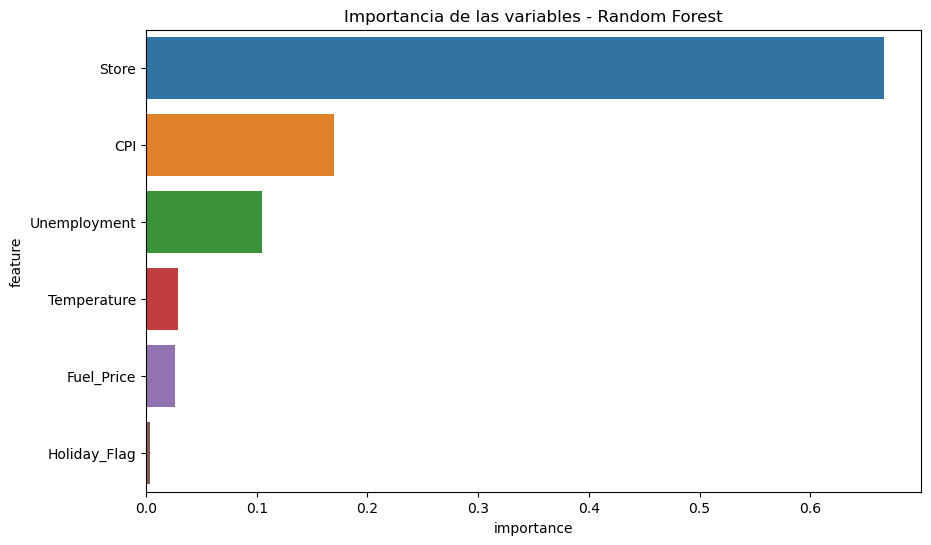

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener las importancias de las características
importances = rf.feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Importancia de las variables - Random Forest')
plt.show()

Podemos ver que las tres variables que más contribuyen a explicar WeeklySales son Store, CPI y Unemployment.

b) Compara los modelos evalúando el R² y el error cuadrático medio (MSE). ¿Cuál es el modelo con mejores métricas? (0.5 puntos)


In [171]:
# Evaluar los modelos con MSE y R2 Score
mse_lm = mean_squared_error(y_test, y_pred_lm)
r2_lm = r2_score(y_test, y_pred_lm)

print(f"Regresión Lineal - MSE: {mse_lm}, R2: {r2_lm}")

Regresión Lineal - MSE: 275179032400.1855, R2: 0.14766226794993753


In [175]:

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf}, R2: {r2_rf}")

Random Forest - MSE: 21999321111.03013, R2: 0.931859446924911


El R2 de Random Forest es más cercano a 1, y además tiene menor MSE, por lo tanto, tiene mejores métricas el modelo de Random Forest

# Ejercicio 5: Conclusiones y Recomendaciones (1 punto)

a) Redacta un informe de máximo 500 palabras resumiendo los principales hallazgos del análisis de datos y la modelización. Incluye tus conclusiones sobre qué factores influyen más en las ventas y recomendaciones para la empresa basadas en el análisis.

Es importante en las ventas la tienda que se trata